# Supplementary and Corraborative analyses

In [1]:
import sys, os
import glob
import json
import pprint
import pandas as pd 
pd.options.mode.chained_assignment = None
import seaborn as sns
import numpy as np 
from scipy.stats import pearsonr


from utils import *
from mediation_estimands import * 
from filter import go_join_filter

import matplotlib
import matplotlib.pyplot as plt

In [2]:
import os
if not os.path.exists('./figs'):
    os.makedirs('./figs')

### Load data 

In [3]:
config = load_config() #Config file with pipeline decisions 
pprint.pprint(config)

{'chunk_path': 'data/chunks1.0/',
 'end_year': 2020,
 'exclude_adv_first_utt': False,
 'exclude_backchannel': False,
 'final_df_path': 'data/df_final.csv',
 'include_fem_issue': False,
 'min_num_chunks_per_just': 1000,
 'num_bootstrap_samples': 1000,
 'prev_utt_path': 'data/prev_utt_1.0/',
 'start_year': 1982}


In [4]:
config['chunk_path']

'data/chunks1.0/'

In [5]:
df_raw = load_chunks_df(config)

num_exclude_adv_first_utt=0
num chunks = len(df)= 75025


### Table A1 (Appendix):  Conditional means of interruption, Y given whether the case topic is about gender issues or not (C)

In [6]:
# Include all data (with or without female issues)
config["include_fem_issue"] = True
df_fem = go_join_filter(df_raw, config)

original dataset num = 75025
dataset w/ {0, 1} ideology mathces num = 68301
Number of justices with >1000 chunks 15
	 ['Anthony M. Kennedy', 'Antonin Scalia', 'Byron R. White', 'David H. Souter', 'Elena Kagan', 'John G. Roberts Jr.', 'John Paul Stevens', 'Ruth Bader Ginsburg', 'Samuel A. Alito Jr.', "Sandra Day O'Connor", 'Sonia Sotomayor', 'Stephen G. Breyer', 'Thurgood Marshall', 'Warren E. Burger', 'William H. Rehnquist']
before justice filter, num chunks = 68301
after justice filter, num chunks = 65756
Saved final df to -> data/df_final.csv


In [7]:
config["include_fem_issue"] = False
df_final = go_join_filter(df_raw, config)

original dataset num = 75025
dataset w/ {0, 1} ideology mathces num = 68301
Number of justices with >1000 chunks 15
	 ['Anthony M. Kennedy', 'Antonin Scalia', 'Byron R. White', 'David H. Souter', 'Elena Kagan', 'John G. Roberts Jr.', 'John Paul Stevens', 'Ruth Bader Ginsburg', 'Samuel A. Alito Jr.', "Sandra Day O'Connor", 'Sonia Sotomayor', 'Stephen G. Breyer', 'Thurgood Marshall', 'Warren E. Burger', 'William H. Rehnquist']
before justice filter, num chunks = 68301
after justice filter, num chunks = 65756
Exluded female issues, num chunks 64164
Saved final df to -> data/df_final.csv


In [8]:
df = df_fem.copy()

In [9]:
e1 = df[(df['advocate_gender']=='M') & (df['female_issue']==0)]['adv_interruption_rate'].mean() 
print("E[Y|C = Other issue,T = M]", np.round(e1, 2))
e2 = df[(df['advocate_gender']=='M') & (df['female_issue']==1)]['adv_interruption_rate'].mean() 
print("E[Y|C = Gender issue, T = M]", np.round(e2, 2))
e3 = df[(df['advocate_gender']=='F') & (df['female_issue']==0)]['adv_interruption_rate'].mean() 
print("E[Y|C = Other issue, T = F]", np.round(e3, 2))
e4 = df[(df['advocate_gender']=='F') & (df['female_issue']==1)]['adv_interruption_rate'].mean() 
print("E[Y|C = Gender issue, T = F]", np.round(e4, 2))

E[Y|C = Other issue,T = M] 10.9
E[Y|C = Gender issue, T = M] 12.47
E[Y|C = Other issue, T = F] 12.35
E[Y|C = Gender issue, T = F] 10.82


### Figure A1: Heatedness 

In [10]:
df = load_final_df(config) # Dataframe after filtering to filters in config.yaml 
                           # (e.g., filtering to justices with the min num chunks) 

Loaded final df from  data/df_final.csv
Number of rows= 64164


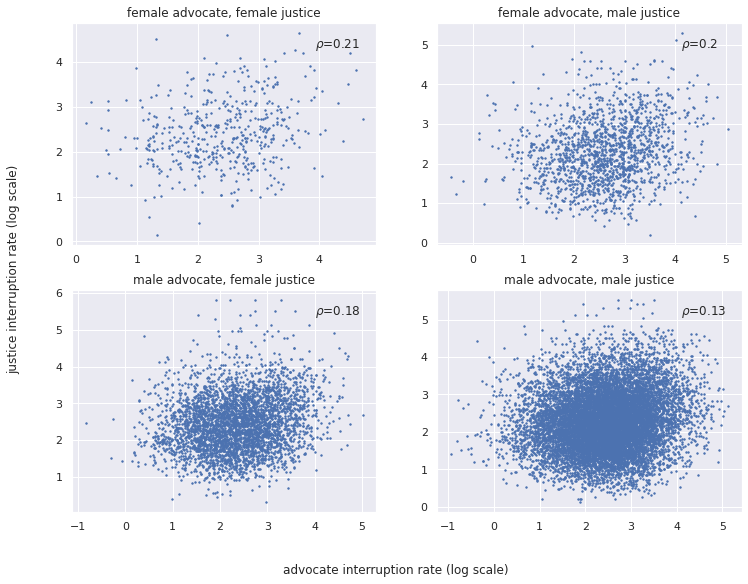

In [11]:
sns.set()
rows=2
cols=2
fig, axes = plt.subplots(rows, cols, figsize=(12,9))

df_f_f = df[(df.advocate_gender=='F') & (df.justice_gender=='F')]
df_f_f = df_f_f[['adv_interruption_rate', 'justice_interruption_rate']]

df_f_f = df_f_f[(df_f_f.adv_interruption_rate!=0) & (df_f_f.justice_interruption_rate!=0)]
df_f_f['adv_interruption_rate'] = df_f_f.apply(lambda x: np.log(x['adv_interruption_rate']), axis=1)
df_f_f['justice_interruption_rate'] = df_f_f.apply(lambda x: np.log(x['justice_interruption_rate']), axis=1)

corr, _ = pearsonr(df_f_f.adv_interruption_rate, df_f_f.justice_interruption_rate)
corr = np.round(corr, 2)
#print('f-f', corr)
axes[0][0].scatter(df_f_f.adv_interruption_rate, df_f_f.justice_interruption_rate, s=2)
axes[0][0].set_title('female advocate, female justice', fontsize=12)
axes[0][0].axes.text(0.8,0.9, r'$\rho$='+str(corr), horizontalalignment='left',\
                                 verticalalignment='center', transform=axes[0][0].transAxes,\
                                 fontsize=12)


df_f_f = df[(df.advocate_gender=='F') & (df.justice_gender=='M')]
df_f_f = df_f_f[['adv_interruption_rate', 'justice_interruption_rate']]

df_f_f = df_f_f[(df_f_f.adv_interruption_rate!=0) & (df_f_f.justice_interruption_rate!=0)]
df_f_f['adv_interruption_rate'] = df_f_f.apply(lambda x: np.log(x['adv_interruption_rate']), axis=1)
df_f_f['justice_interruption_rate'] = df_f_f.apply(lambda x: np.log(x['justice_interruption_rate']), axis=1)

corr, _ = pearsonr(df_f_f.adv_interruption_rate, df_f_f.justice_interruption_rate)
corr = np.round(corr, 2)
#print('f-m', corr)
axes[0][1].scatter(df_f_f.adv_interruption_rate, df_f_f.justice_interruption_rate, s=2)
axes[0][1].set_title('female advocate, male justice', fontsize=12)
axes[0][1].axes.text(2,0.9, r'$\rho$='+str(corr), horizontalalignment='left',\
                                 verticalalignment='center', transform=axes[0][0].transAxes,\
                                 fontsize=12)


df_f_f = df[(df.advocate_gender=='M') & (df.justice_gender=='F')]
df_f_f = df_f_f[['adv_interruption_rate', 'justice_interruption_rate']]

df_f_f = df_f_f[(df_f_f.adv_interruption_rate!=0) & (df_f_f.justice_interruption_rate!=0)]
df_f_f['adv_interruption_rate'] = df_f_f.apply(lambda x: np.log(x['adv_interruption_rate']), axis=1)
df_f_f['justice_interruption_rate'] = df_f_f.apply(lambda x: np.log(x['justice_interruption_rate']), axis=1)

corr, _ = pearsonr(df_f_f.adv_interruption_rate, df_f_f.justice_interruption_rate)
corr = np.round(corr, 2)
#print('m-f', corr)
axes[1][0].scatter(df_f_f.adv_interruption_rate, df_f_f.justice_interruption_rate, s=2)
axes[1][0].set_title('male advocate, female justice', fontsize=12)
axes[1][0].axes.text(0.8,-0.3, r'$\rho$='+str(corr), horizontalalignment='left',\
                                 verticalalignment='center', transform=axes[0][0].transAxes,\
                                 fontsize=12)


df_f_f = df[(df.advocate_gender=='M') & (df.justice_gender=='M')]
df_f_f = df_f_f[['adv_interruption_rate', 'justice_interruption_rate']]

df_f_f = df_f_f[(df_f_f.adv_interruption_rate!=0) & (df_f_f.justice_interruption_rate!=0)]
df_f_f['adv_interruption_rate'] = df_f_f.apply(lambda x: np.log(x['adv_interruption_rate']), axis=1)
df_f_f['justice_interruption_rate'] = df_f_f.apply(lambda x: np.log(x['justice_interruption_rate']), axis=1)

corr, _ = pearsonr(df_f_f.adv_interruption_rate, df_f_f.justice_interruption_rate)
corr = np.round(corr, 2)
#print('m-m', corr)
axes[1][1].scatter(df_f_f.adv_interruption_rate, df_f_f.justice_interruption_rate, s=2)
axes[1][1].set_title('male advocate, male justice', fontsize=12)
axes[1][1].axes.text(2,-0.3, r'$\rho$='+str(corr), horizontalalignment='left',\
                                 verticalalignment='center', transform=axes[0][0].transAxes,\
                                 fontsize=12)

        
fig.text(0.5, 0.03, 'advocate interruption rate (log scale)', ha='center', fontsize=12)
fig.text(0.05, 0.5, 'justice interruption rate (log scale)', va='center', rotation='vertical', fontsize=12)

plt.savefig("figs/figA1-heatedness.pdf")

plt.show()

### Table 4: Corroborative mediation analyses

We only use 2007 onwards in the data because speech disfluencies were not recorded consistently. 

Our mediators are: 
- Speech disfluencies as mediator
- deological alignment as mediator
- Advocate experience as mediator 

and we calculate the natural direct effect (NDE) and natural indirect effect (NIE) from treatment (gender of the advocate) to outcome (token-normalized interruption rate). 

In [12]:
df_subset = df[df['case_year'] >= 2007]

In [13]:
len(df_subset), len(set(df_subset.justice_name))

(17801, 10)

## Corroborative analyses

### Background on estimand analysis with mediation

#### Analysis 

All of these are all conditional on the chunks that the justice is speaking in 

 Total effect 

$$ TE = E [Y|T=1] - E[Y|T=0] $$

Pearl, Causal Inference in Statastics

Eqns. 4.50 and 4.52

$$ NDE = \sum_m [E[Y|T=1, M=m] - E[Y|T=0, M=m]]\cdot P(M=m|T=0)$$

$$ NIE = \sum_m [E[Y|T=0, M=m]] \cdot [P(M=m|T=1)- P(M=m|T=0)]$$

where 

$$ P(M=m|T=0) = \frac{\text{count\_chunks}(M=m \cap T=0)}{\text{count\_chunks}(T=0)} $$

These will be per-justice values. The expected values are over all valid chunks for that justice. 

Our variables:  
- $M$ (mediators) = Either (a) speech disfluency tertiles (3 values) or (b) advocate-justice ideology match (2 values)
- $T$ (treatment) = $T=1$ if advocate female, $T=0$ if male
- $Y$ (outcome) = interruption rate (# utts justice interrupts advocate/ # utts in a chunk)

In [14]:
def get_estimands(df_input, mediator_colm_name, treatment_colm_name, outcome_colm_name,\
                  num_bootstraps, justice_gender_map): 
    
    justices = list(set(df_input['justice_name']))
    
    #ideology per justice
    ideology_map = {}
    for just in justices: 
        #print(just)
        ideology_map[just] = df_input[df_input.justice_name==just]['justice_ideology'].iloc[0]
        

    #get estimands through mediated paths 
    df_mediated_effects = []
    df_mediated_effects_male = []
    df_mediated_effects_female = []
    
    bootsraps_for_mediated_effects = {}
    for just in justices: 
        df_just = make_df_justice_general(just, df_input,\
                                        mediator_colm_name = mediator_colm_name,\
                                        treatment_colm_name = treatment_colm_name,\
                                        outcome_colm_name = outcome_colm_name)
        

        T_hat = pearls_mediation(df_just, just)

        # get bootstrap std
        bootstraps = []
        for bs in range(num_bootstraps):
            df_just_bs = df_just.sample(frac=1, replace=True)
            out_bs = pearls_mediation(df_just_bs, just)
            bootstraps.append(out_bs)

        for m in ['nde', 'nie']:
            std = get_std(bootstraps, T_hat, m)
            T_hat['std_'+m] = std

        T_hat["num_chunks"] = len(df_input[df_input.justice_name==just]) 
        df_mediated_effects.append(T_hat)
        
        if justice_gender_map[just]=='M':
            df_mediated_effects_male.append(T_hat)
        if justice_gender_map[just]=='F':
            df_mediated_effects_female.append(T_hat)
        bootsraps_for_mediated_effects[just] = bootstraps
        
    df_mediated_effects = pd.DataFrame(df_mediated_effects)
    df_mediated_effects_male = pd.DataFrame(df_mediated_effects_male)
    df_mediated_effects_female = pd.DataFrame(df_mediated_effects_female)
    
    ###### NDE ######
    
    #average nde over all justices
    bootsraps_for_mean_mediated_effect = []
    for boot in range(num_bootstraps):
        mediated_effects_over_just = []
        for just, effects in bootsraps_for_mediated_effects.items():
            mediated_effects_over_just.append(effects[boot]['nde'])
        bootsraps_for_mean_mediated_effect.append(pd.DataFrame(mediated_effects_over_just, columns=['nde']))

    avg_just_nde_hat = {'nde': df_mediated_effects['nde'].mean()} 
    avg_just_nde_hat['std_'+'nde'] = get_std(bootsraps_for_mean_mediated_effect, avg_just_nde_hat, 'nde')
    
    #average nde over male justices
    bootsraps_for_mean_mediated_effect_male = []
    for boot in range(num_bootstraps):
        mediated_effects_over_just_male = []
        for just, effects in bootsraps_for_mediated_effects.items():
            if justice_gender_map[just]=='M':
                mediated_effects_over_just_male.append(effects[boot]['nde'])
        bootsraps_for_mean_mediated_effect_male.append(pd.DataFrame(mediated_effects_over_just_male,\
                                                                    columns=['nde']))

    avg_just_male_nde_hat = {'nde': df_mediated_effects_male['nde'].mean()} 
    avg_just_male_nde_hat['std_'+'nde'] = std = get_std(bootsraps_for_mean_mediated_effect_male,\
                                                        avg_just_male_nde_hat,'nde')
    
    #average nde over female justices
    bootsraps_for_mean_mediated_effect_female = []
    for boot in range(num_bootstraps):
        mediated_effects_over_just_female = []
        for just, effects in bootsraps_for_mediated_effects.items():
            if justice_gender_map[just]=='F':
                mediated_effects_over_just_female.append(effects[boot]['nde'])
        bootsraps_for_mean_mediated_effect_female.append(\
                                pd.DataFrame(mediated_effects_over_just_female,\
                                             columns=['nde']))

    avg_just_female_nde_hat = {'nde': df_mediated_effects_female['nde'].mean()} 
    avg_just_female_nde_hat['std_'+'nde'] = get_std(bootsraps_for_mean_mediated_effect_female,\
                                                    avg_just_female_nde_hat, 'nde')
    
    
    ###### NIE ######
        
    #average nie over all justices
    bootsraps_for_mean_mediated_effect = []
    for boot in range(num_bootstraps):
        mediated_effects_over_just = []
        for just, effects in bootsraps_for_mediated_effects.items():
            mediated_effects_over_just.append(effects[boot]['nie'])
        bootsraps_for_mean_mediated_effect.append(pd.DataFrame(mediated_effects_over_just, columns=['nie']))
    
    avg_just_nie_hat = {'nie': df_mediated_effects['nie'].mean()} 
    avg_just_nie_hat['std_'+'nie'] = get_std(bootsraps_for_mean_mediated_effect, avg_just_nie_hat, 'nie')
    
    #average nie over male justices
    bootsraps_for_mean_mediated_effect_male = []
    for boot in range(num_bootstraps):
        mediated_effects_over_just_male = []
        for just, effects in bootsraps_for_mediated_effects.items():
            if justice_gender_map[just]=='M':
                mediated_effects_over_just_male.append(effects[boot]['nie'])
        bootsraps_for_mean_mediated_effect_male.append(pd.DataFrame(\
                                mediated_effects_over_just_male, columns=['nie']))
    avg_just_male_nie_hat = {'nie': df_mediated_effects_male['nie'].mean()} 
    avg_just_male_nie_hat['std_'+'nie'] = get_std(bootsraps_for_mean_mediated_effect_male,\
                                                  avg_just_male_nie_hat, 'nie')
    
    
    #average nie over female justices
    bootsraps_for_mean_mediated_effect_female = []
    for boot in range(num_bootstraps):
        mediated_effects_over_just_female = []
        
        for just, effects in bootsraps_for_mediated_effects.items():
            if justice_gender_map[just]=='F':
                mediated_effects_over_just_female.append(effects[boot]['nie'])
                
        bootsraps_for_mean_mediated_effect_female.append(pd.DataFrame(mediated_effects_over_just_female,\
                                                         columns=['nie']))
    avg_just_female_nie_hat = {'nie': df_mediated_effects_female['nie'].mean()} 
    avg_just_female_nie_hat['std_'+'nie'] = get_std(bootsraps_for_mean_mediated_effect_female,\
                                                    avg_just_female_nie_hat, 'nie')


    return {'mediator_colm_name': mediator_colm_name,  
            'mediated': df_mediated_effects, 
            'avg_direct_effect_over_justices':avg_just_nde_hat,
            'avg_direct_effect_over_male_justices':avg_just_male_nde_hat,
            'avg_direct_effect_over_female_justices':avg_just_female_nde_hat,
            'avg_indirect_effect_over_justices':avg_just_nie_hat,
            'avg_indirect_effect_over_male_justices':avg_just_male_nie_hat,
            'avg_indirect_effect_over_female_justices':avg_just_female_nie_hat,
            'ideology_map': ideology_map}

In [15]:
def get_std(bootstraps, T_hat, metric):
    #Using 6.16 Theorem (Normal-based Confidence Interval; 95%) in Wasserman 2004 
    bootstrap_distribution = []
    for b in bootstraps:
        bootstrap_distribution.append(b[metric].mean())
    
    std_error = np.std(bootstrap_distribution)   
    return std_error

In [48]:
with open("../raw_data/justice2gender.json", "r") as f: 
    justice_gender_map = json.load(f)

### Load data

In [44]:
df = load_final_df(config) # Dataframe after filtering to filters in config.yaml 
                           # (e.g., filtering to justices with the min num chunks) 
    
df_subset = df[df['case_year'] >= 2007]

print("----Number of chunks----")
print('Justices:All', len(df_subset))
print('Justices:Female', len(df_subset[df_subset.justice_gender=='F']))
print('Justices:Male', len(df_subset[df_subset.justice_gender=='M']))

Loaded final df from  data/df_final.csv
Number of rows= 64164
----Number of chunks----
Justices:All 17801
Justices:Female 5980
Justices:Male 11821


### Mediation by speech disfluencies

In [17]:
### get speech disfluencies variable

df_subset['adv_disfl_rate'] = 1000*df_subset['num_adv_disfl']/df_subset['num_toks_adv']
adv_disfl_rate = df_subset['adv_disfl_rate'].to_numpy()

# discretizing disfluency rates
# let's just go with the third quantiles (tertiles) for now 
t1 = np.quantile(adv_disfl_rate, 1/3)
t2 = np.quantile(adv_disfl_rate, 2/3)
print('disfluency rate (first quantile): ', t1)
print('disfluency rate (second quantile): ', t2)


# add discretized version to the data frame 
adv_disfl_rate_tertiles = []
for x in adv_disfl_rate: 
    if 0 <= x < t1: 
        adv_disfl_rate_tertiles.append(0)
    elif t1 <= x < t2: 
        adv_disfl_rate_tertiles.append(1)
    elif t2 <= x: 
        adv_disfl_rate_tertiles.append(2)
assert len(adv_disfl_rate_tertiles) == len(adv_disfl_rate) == len(df_subset)
df_subset['adv_disfl_rate_tertiles'] = np.array(adv_disfl_rate_tertiles).astype(int)

disfluency rate (first quantile):  14.77832512315271
disfluency rate (second quantile):  29.41176470588235


In [18]:
mediator_colm_name = 'adv_disfl_rate_tertiles'
treatment_colm_name = 'advocate_gender'
outcome_colm_name = 'adv_interruption_rate'
out_sd = get_estimands(df_subset, mediator_colm_name, treatment_colm_name, outcome_colm_name,\
                             config['num_bootstrap_samples'], justice_gender_map)

### Mediation by ideological alignment

In [19]:
mediator_colm_name = 'ideology_matches'
treatment_colm_name = 'advocate_gender'
outcome_colm_name = 'adv_interruption_rate'
out_ia = get_estimands(df_subset, mediator_colm_name, treatment_colm_name, outcome_colm_name,\
                             config['num_bootstrap_samples'], justice_gender_map)

### Mediation by advocate experience

In [20]:
mediator_colm_name = 'adv_experience_bin'
treatment_colm_name = 'advocate_gender'
outcome_colm_name = 'adv_interruption_rate'
out_exp = get_estimands(df_subset, mediator_colm_name, treatment_colm_name, outcome_colm_name,\
                             config['num_bootstrap_samples'], justice_gender_map)

### Print results for Table 4

In [23]:
print('Justices:All')
print("----NDE----")
e1 = out_sd["avg_direct_effect_over_justices"]['nde']
e1_std = out_sd["avg_direct_effect_over_justices"]['std_nde']
e1_ci = e1_std*1.96
print("Mediator:Speech Disfluencies", np.round(e1, 2), "+-", np.round(e1_ci, 2))

e1 = out_ia["avg_direct_effect_over_justices"]['nde']
e1_std = out_ia["avg_direct_effect_over_justices"]['std_nde']
e1_ci = e1_std*1.96
print("Mediator:Ideological Alignment", np.round(e1, 2), "+-", np.round(e1_ci, 2))

e1 = out_exp["avg_direct_effect_over_justices"]['nde']
e1_std = out_exp["avg_direct_effect_over_justices"]['std_nde']
e1_ci = e1_std*1.96
print("Mediator:Advocate Experience", np.round(e1, 2), "+-", np.round(e1_ci, 2))


print("----NIE----")
e1 = out_sd["avg_indirect_effect_over_justices"]['nie']
e1_std = out_sd["avg_indirect_effect_over_justices"]['std_nie']
e1_ci = e1_std*1.96
print("Mediator:Speech Disfluencies", np.round(e1, 2), "+-", np.round(e1_ci, 2))

e1 = out_ia["avg_indirect_effect_over_justices"]['nie']
e1_std = out_ia["avg_indirect_effect_over_justices"]['std_nie']
e1_ci = e1_std*1.96
print("Mediator:Ideological Alignment", np.round(e1, 2), "+-", np.round(e1_ci, 2))

e1 = out_exp["avg_indirect_effect_over_justices"]['nie']
e1_std = out_exp["avg_indirect_effect_over_justices"]['std_nie']
e1_ci = e1_std*1.96
print("Mediator:Advocate Experience", np.round(e1, 2), "+-", np.round(e1_ci, 2))

Justices:All
----NDE----
Mediator:Speech Disfluencies 0.73 +- 0.6
Mediator:Ideological Alignment 0.83 +- 0.69
Mediator:Advocate Experience 0.68 +- 0.7
----NIE----
Mediator:Speech Disfluencies 0.07 +- 0.29
Mediator:Ideological Alignment 0.04 +- 0.05
Mediator:Advocate Experience -0.03 +- 0.08


In [24]:
print('Justices:Male')
print("----NDE----")
e1 = out_sd["avg_direct_effect_over_male_justices"]['nde']
e1_std = out_sd["avg_direct_effect_over_male_justices"]['std_nde']
e1_ci = e1_std*1.96
print("Mediator:Speech Disfluencies", np.round(e1, 2), "+-", np.round(e1_ci, 2))

e1 = out_ia["avg_direct_effect_over_male_justices"]['nde']
e1_std = out_ia["avg_direct_effect_over_male_justices"]['std_nde']
e1_ci = e1_std*1.96
print("Mediator:Ideological Alignment", np.round(e1, 2), "+-", np.round(e1_ci, 2))

e1 = out_exp["avg_direct_effect_over_male_justices"]['nde']
e1_std = out_exp["avg_direct_effect_over_male_justices"]['std_nde']
e1_ci = e1_std*1.96
print("Mediator:Advocate Experience", np.round(e1, 2), "+-", np.round(e1_ci, 2))


print("----NIE----")
e1 = out_sd["avg_indirect_effect_over_male_justices"]['nie']
e1_std = out_sd["avg_indirect_effect_over_male_justices"]['std_nie']
e1_ci = e1_std*1.96
print("Mediator:Speech Disfluencies", np.round(e1, 2), "+-", np.round(e1_ci, 2))

e1 = out_ia["avg_indirect_effect_over_male_justices"]['nie']
e1_std = out_ia["avg_indirect_effect_over_male_justices"]['std_nie']
e1_ci = e1_std*1.96
print("Mediator:Ideological Alignment", np.round(e1, 2), "+-", np.round(e1_ci, 2))

e1 = out_exp["avg_indirect_effect_over_male_justices"]['nie']
e1_std = out_exp["avg_indirect_effect_over_male_justices"]['std_nie']
e1_ci = e1_std*1.96
print("Mediator:Advocate Experience", np.round(e1, 2), "+-", np.round(e1_ci, 2))

Justices:Male
----NDE----
Mediator:Speech Disfluencies 1.2 +- 0.78
Mediator:Ideological Alignment 1.36 +- 0.92
Mediator:Advocate Experience 1.18 +- 0.91
----NIE----
Mediator:Speech Disfluencies 0.12 +- 0.41
Mediator:Ideological Alignment 0.06 +- 0.08
Mediator:Advocate Experience 0.0 +- 0.11


In [26]:
print('Justices:Female')
print("----NDE----")
e1 = out_sd["avg_direct_effect_over_female_justices"]['nde']
e1_std = out_sd["avg_direct_effect_over_female_justices"]['std_nde']
e1_ci = e1_std*1.96
print("Mediator:Speech Disfluencies", np.round(e1, 2), "+-", np.round(e1_ci, 2))

e1 = out_ia["avg_direct_effect_over_female_justices"]['nde']
e1_std = out_ia["avg_direct_effect_over_female_justices"]['std_nde']
e1_ci = e1_std*1.96
print("Mediator:Ideological Alignment", np.round(e1, 2), "+-", np.round(e1_ci, 2))

e1 = out_exp["avg_direct_effect_over_female_justices"]['nde']
e1_std = out_exp["avg_direct_effect_over_female_justices"]['std_nde']
e1_ci = e1_std*1.96
print("Mediator:Advocate Experience", np.round(e1, 2), "+-", np.round(e1_ci, 2))


print("----NIE----")
e1 = out_sd["avg_indirect_effect_over_female_justices"]['nie']
e1_std = out_sd["avg_indirect_effect_over_female_justices"]['std_nie']
e1_ci = e1_std*1.96
print("Mediator:Speech Disfluencies", np.round(e1, 2), "+-", np.round(e1_ci, 2))

e1 = out_ia["avg_indirect_effect_over_female_justices"]['nie']
e1_std = out_ia["avg_indirect_effect_over_female_justices"]['std_nie']
e1_ci = e1_std*1.96
print("Mediator:Ideological Alignment", np.round(e1, 2), "+-", np.round(e1_ci, 2))

e1 = out_exp["avg_indirect_effect_over_female_justices"]['nie']
e1_std = out_exp["avg_indirect_effect_over_female_justices"]['std_nie']
e1_ci = e1_std*1.96
print("Mediator:Advocate Experience", np.round(e1, 2), "+-", np.round(e1_ci, 2))

Justices:Female
----NDE----
Mediator:Speech Disfluencies -0.38 +- 0.84
Mediator:Ideological Alignment -0.38 +- 0.87
Mediator:Advocate Experience -0.48 +- 0.86
----NIE----
Mediator:Speech Disfluencies -0.03 +- 0.26
Mediator:Ideological Alignment -0.01 +- 0.04
Mediator:Advocate Experience -0.1 +- 0.1
